In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews_data = []

for i in range(1, 38):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract review stars and HTML
    for review_article in parsed_content.find_all("article", {"itemprop": "review"}):
      soup = BeautifulSoup(review_article.decode_contents(), 'html.parser')
      date_of_review = soup.find("meta", itemprop="datePublished")["content"]
      author_name = soup.find("span", itemprop="name").get_text(strip=True)
      route_node = soup.find("td", class_="review-rating-header", text="Route")
      route = None
      if route_node is not None:
        route = route_node.find_next("td", class_="review-value").get_text(strip=True)
      starting_point = None
      destination = None
      if (route is not None) and ("to" in route):
        route_array = route.split(" to ")
        starting_point = route_array[0]
        destination = route_array[-1]
        destination = destination.split("via")[0]


      date_flown_node = soup.find("td", class_="review-rating-header", text="Date Flown")
      date_flown = None
      if date_flown_node is not None:
        date_flown = date_flown_node.find_next("td", class_="review-value").get_text(strip=True)

      type_of_traveller = "not_found"
      type_of_traveller_node = soup.find("td", class_="review-rating-header", text="Type Of Traveller")
      if type_of_traveller_node is not None:
        type_of_traveller = type_of_traveller_node.find_next("td", class_="review-value").get_text(strip=True)
      reviews_data.append({"date_of_review": date_of_review, "author_name": author_name, "route": route, "booking_origin": starting_point, "booking_destination": destination, "date_flown": date_flown, "trip_type": type_of_traveller})

df = pd.DataFrame(reviews_data)

df




Scraping page 1


<ipython-input-2-927f8a871c16>:28: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  route_node = soup.find("td", class_="review-rating-header", text="Route")
<ipython-input-2-927f8a871c16>:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  date_flown_node = soup.find("td", class_="review-rating-header", text="Date Flown")
<ipython-input-2-927f8a871c16>:47: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  type_of_traveller_node = soup.find("td", class_="review-rating-header", text="Type Of Traveller")


Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37


,date_of_review,author_name,route,booking_origin,booking_destination,date_flown,trip_type
0,2023-12-20,C Shaw,Cyprus to New York,Cyprus,New York,December 2023,Family Leisure
1,2023-12-20,C Horner,Gran Canaria to London Gatwick,Gran Canaria,London Gatwick,December 2023,Solo Leisure
2,2023-12-18,C Lowe,Belfast City to Atlanta via London Heathrow,Belfast City,Atlanta,November 2023,Couple Leisure
3,2023-12-17,Greg Zarelli,London to Portland,London,Portland,December 2023,Business
4,2023-12-15,D Kears,London to Frankfurt,London,Frankfurt,June 2023,Solo Leisure
...,...,...,...,...,...,...,...
3695,2014-05-07,Alan Clare,None,None,None,None,not_found
3696,2014-05-07,A Amaladoss,None,None,None,None,not_found
3697,2014-05-06,C Thomas,None,None,None,None,not_found
3698,2014-05-06,Berry Nick,None,None,None,None,not_found


In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_of_review       3700 non-null   object
 1   author_name          3700 non-null   object
 2   route                2944 non-null   object
 3   booking_origin       2929 non-null   object
 4   booking_destination  2929 non-null   object
 5   date_flown           2941 non-null   object
 6   trip_type            3700 non-null   object
dtypes: object(7)
memory usage: 202.5+ KB


In [5]:
df.dropna()

,date_of_review,author_name,route,booking_origin,booking_destination,date_flown,trip_type
0,2023-12-20,C Shaw,Cyprus to New York,Cyprus,New York,December 2023,Family Leisure
1,2023-12-20,C Horner,Gran Canaria to London Gatwick,Gran Canaria,London Gatwick,December 2023,Solo Leisure
2,2023-12-18,C Lowe,Belfast City to Atlanta via London Heathrow,Belfast City,Atlanta,November 2023,Couple Leisure
3,2023-12-17,Greg Zarelli,London to Portland,London,Portland,December 2023,Business
4,2023-12-15,D Kears,London to Frankfurt,London,Frankfurt,June 2023,Solo Leisure
...,...,...,...,...,...,...,...
2933,2015-06-14,Nazira Khatun,London to Turkey,London,Turkey,June 2015,Couple Leisure
2934,2015-06-14,Nur Afiqah Rahmat,Abu Dhabi to Muscat,Abu Dhabi,Muscat,June 2015,Solo Leisure
2935,2015-06-14,J Harrison,LHR to YYZ,LHR,YYZ,May 2015,Solo Leisure
2936,2015-06-13,Steve Gatenby,LGW to VCE,LGW,VCE,June 2015,Couple Leisure


In [6]:
# Visualization - Trip Type Distribution
trip_type_distribution = df['trip_type'].value_counts()

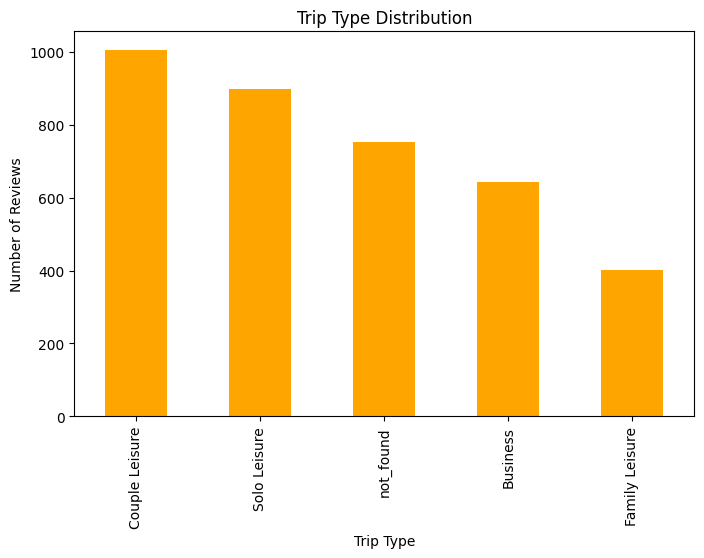

In [7]:
plt.figure(figsize=(8, 5))
trip_type_distribution.plot(kind='bar', color='orange')
plt.title('Trip Type Distribution')
plt.xlabel('Trip Type')
plt.ylabel('Number of Reviews')
plt.show()

In [8]:
# Visualization - Booking Origin Distribution
booking_origin_distribution = df['booking_origin'].value_counts().head(10)

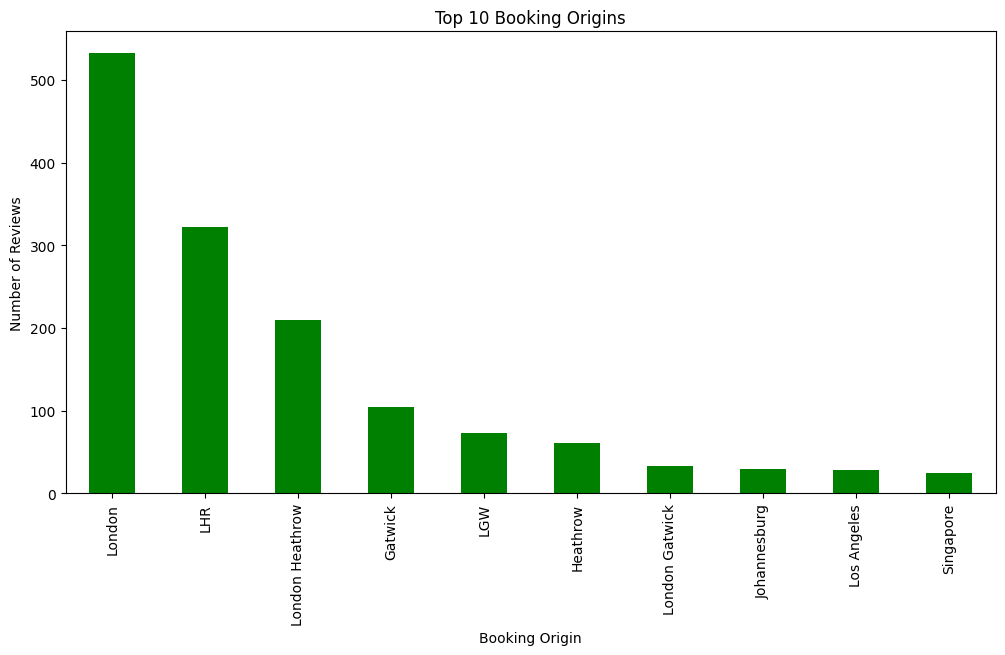

In [9]:
plt.figure(figsize=(12, 6))
booking_origin_distribution.plot(kind='bar', color='green')
plt.title('Top 10 Booking Origins')
plt.xlabel('Booking Origin')
plt.ylabel('Number of Reviews')
plt.show()

In [10]:
# Data Preparation
df['date_of_review'] = pd.to_datetime(df.index)


In [11]:
# Extracting the month and year from the 'date_of_review' column
def extract_first_part(date_str):
    if pd.notnull(date_str):
        return date_str.split()[0]
    else:
        return None
df['month_flown'] = df['date_flown'].apply(extract_first_part)


In [12]:
# Filtering out rows where 'date_flown' is not NaN
valid_month_flown = df['month_flown'].notna()

In [13]:
# Define months associated with holidays
holiday_months = ['December', 'November', 'October', 'July', 'August']

In [14]:
# Check if any of the holiday months are present in 'date_flown'
holiday_bookings = df[valid_month_flown & df['month_flown'].str.contains('|'.join(holiday_months), case=False)]

In [15]:
# Count the number of reviews/bookings for each month_year
monthly_booking_count = df.groupby('date_flown').size()

In [16]:
# Count the number of reviews/bookings during holidays for each month_year
holidays_booking_count = holiday_bookings.groupby('date_flown').size()

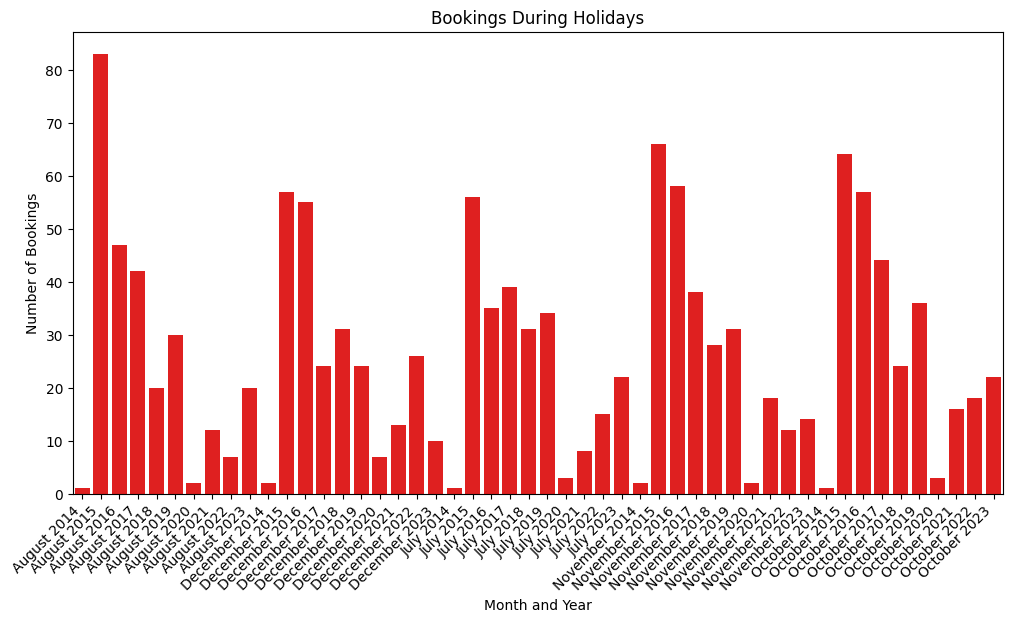

In [17]:
# Check if 'holidays_booking_count' is not empty before plotting
if not holidays_booking_count.empty:
    # Convert 'holidays_booking_count' to a DataFrame for plotting
    holidays_booking_count = holidays_booking_count.reset_index()

    # Visualization - Bookings During Holidays
    plt.figure(figsize=(12, 6))
    sns.barplot(x='date_flown', y=0, data=holidays_booking_count, color='red')
    plt.title('Bookings During Holidays')
    plt.xlabel('Month and Year')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No bookings during holidays.")

In [18]:
from datetime import datetime, timedelta

<ipython-input-19-9c0619a2c583>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  holidays = recent_data[valid_month_flown & recent_data['date_flown'].str.contains('|'.join(holiday_months), case=False)]


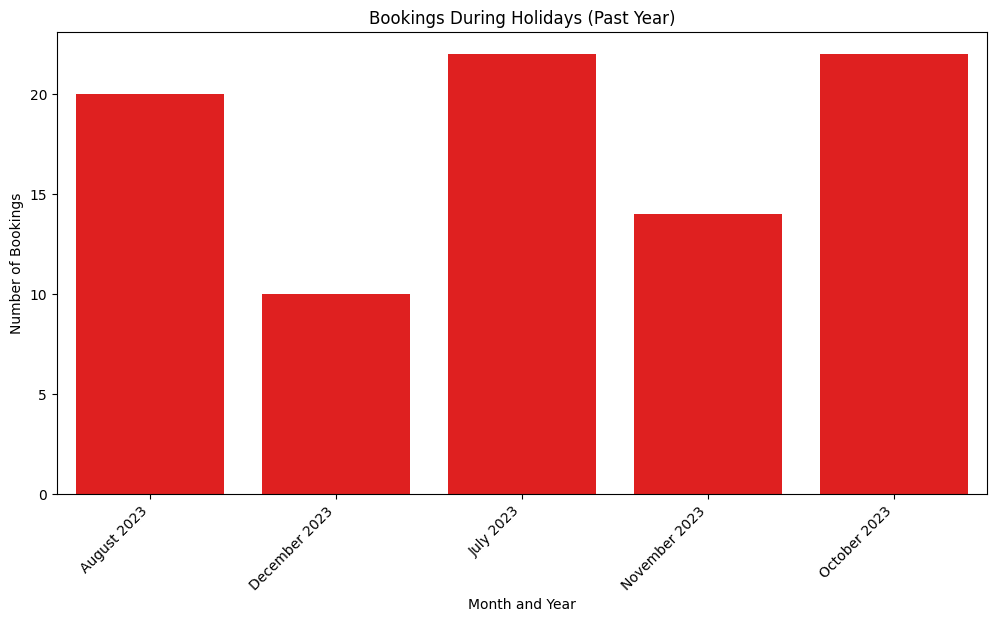

In [19]:
# Calculate the date one year ago from the current date
one_year_ago = datetime.now() - timedelta(days=365)

# Filter rows for the past year

# Extracting the month and year from the 'date_flown' column

df['date_flown_dt'] = pd.to_datetime(df['date_flown'], errors='coerce')
recent_data = df[df['date_flown_dt'] >= one_year_ago]

# Define months associated with holidays
holiday_months = ['December', 'November', 'October', 'July', 'August']

# Check if any of the holiday months are present in 'date_flown'
holidays = recent_data[valid_month_flown & recent_data['date_flown'].str.contains('|'.join(holiday_months), case=False)]

# Count the number of reviews/bookings during holidays for each month_year
holidays_booking_count = holidays.groupby('date_flown').size()

# Check if 'holidays_booking_count' is not empty before plotting
if not holidays_booking_count.empty:
    # Convert 'holidays_booking_count' to a DataFrame for plotting
    holidays_booking_count = holidays_booking_count.reset_index()

    # Visualization - Bookings During Holidays
    plt.figure(figsize=(12, 6))
    sns.barplot(x='date_flown', y=0, data=holidays_booking_count, color='red')
    plt.title('Bookings During Holidays (Past Year)')
    plt.xlabel('Month and Year')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No bookings during holidays in the past year.")


<ipython-input-20-9a27aa4a81c8>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  holidays = recent_data[valid_month_flown & recent_data['date_flown'].str.contains('|'.join(holiday_months), case=False)]


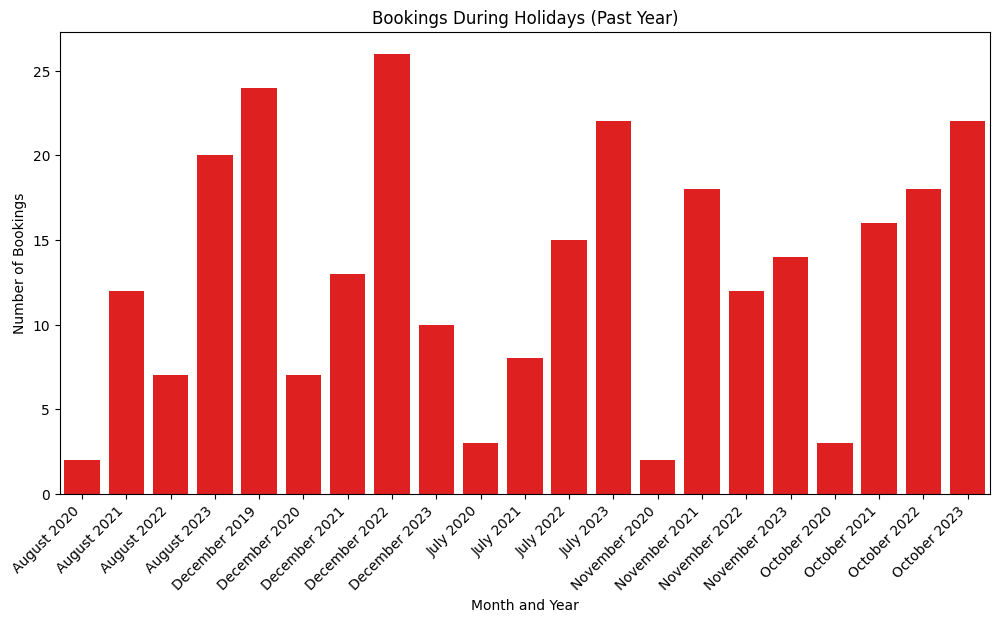

In [20]:
# Calculate the date one year ago from the current date
one_year_ago = datetime.now() - timedelta(days=1500)

# Filter rows for the past year

# Extracting the month and year from the 'date_flown' column

df['date_flown_dt'] = pd.to_datetime(df['date_flown'], errors='coerce')
recent_data = df[df['date_flown_dt'] >= one_year_ago]

# Define months associated with holidays
holiday_months = ['December', 'November', 'October', 'July', 'August']

# Check if any of the holiday months are present in 'date_flown'
holidays = recent_data[valid_month_flown & recent_data['date_flown'].str.contains('|'.join(holiday_months), case=False)]

# Count the number of reviews/bookings during holidays for each month_year
holidays_booking_count = holidays.groupby('date_flown').size()

# Check if 'holidays_booking_count' is not empty before plotting
if not holidays_booking_count.empty:
    # Convert 'holidays_booking_count' to a DataFrame for plotting
    holidays_booking_count = holidays_booking_count.reset_index()

    # Visualization - Bookings During Holidays
    plt.figure(figsize=(12, 6))
    sns.barplot(x='date_flown', y=0, data=holidays_booking_count, color='red')
    plt.title('Bookings During Holidays (Past Year)')
    plt.xlabel('Month and Year')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No bookings during holidays in the past year.")


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dt
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


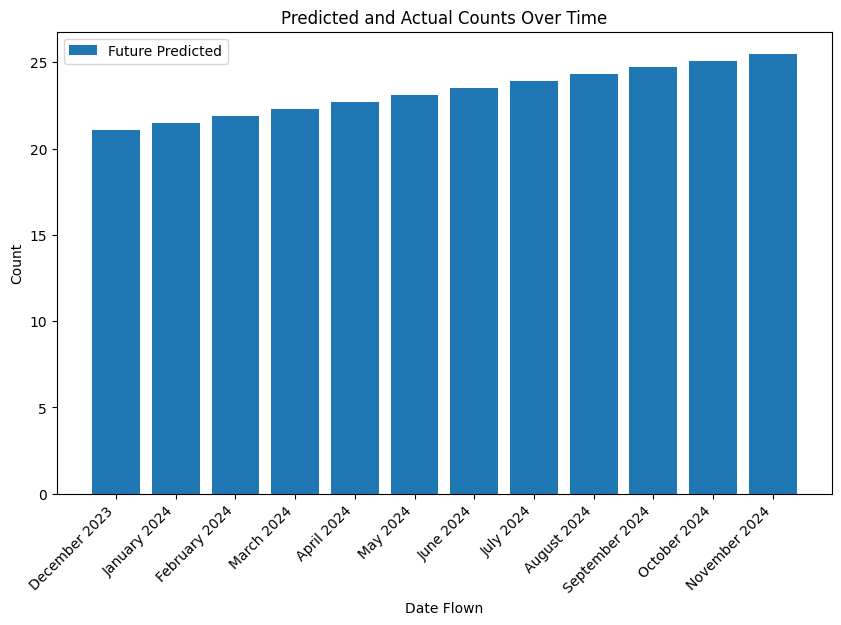

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import numpy as np
import copy

machine_learning_df = copy.deepcopy(df)


dependent_variable = 'trip_type'
independent_variable = 'date_flown_dt'

machine_learning_df['date_flown']
machine_learning_df = machine_learning_df[machine_learning_df['date_flown'].notna()]

post_covid_trips = machine_learning_df[machine_learning_df['date_flown_dt'] > pd.to_datetime('2021-01-31')]

trips_counts = post_covid_trips.groupby(['date_flown_dt']).size().reset_index(name='count')

trips_counts_training = copy.deepcopy(trips_counts)

trips_counts_training['date_flown_numeric'] = trips_counts['date_flown_dt'].apply(lambda x: x.toordinal())


X = trips_counts_training[['date_flown_numeric']]
y = trips_counts_training['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Generate future dates for the next 12 months
future_dates = pd.date_range(start=df['date_flown_dt'].max(), periods=12, freq='MS')

# Convert future dates to ordinal
future_dates_numeric = future_dates.map(dt.datetime.toordinal)

# Predict counts for the next 12 months
future_counts = model.predict(np.array(future_dates_numeric).reshape(-1, 1))

# Create a DataFrame with the predicted counts
future_counts_df = pd.DataFrame({'date_flown_dt': future_dates.strftime('%B %Y'), 'count_predicted': future_counts})


plt.figure(figsize=(10, 6))
plt.bar(future_counts_df['date_flown_dt'], future_counts_df['count_predicted'], label='Future Predicted')

# Plot actual counts

# Set labels and title
plt.xlabel('Date Flown')
plt.ylabel('Count')
plt.title('Predicted and Actual Counts Over Time')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

# Add legend
plt.legend()

# Show the plot
plt.show()



